<a href="https://colab.research.google.com/github/threegenie/titanic_prediction/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survivor Prediction

 * Used Data : https://www.kaggle.com/c/titanic/data





survived: 생존여부 / pclass: 좌석등급 / sex: 성별

age: 나이 / sibsp: 형제자매 + 배우자 숫자 parch: 부모자식 숫자 

fare: 요금 / class: 좌석등급 / embarked: 탑승 항구

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape, test.shape

((891, 12), (418, 11))

> test 데이터에 없는 하나의 feature인 'Survived'를 예측하는 문제임을 알 수 있다.


> 예측에는 PassengerId, Name, Ticket, Cabin 특성을 제외한다. 의미가 없거나 처리가 애매하기 때문이다.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


####탐색적 데이터 분석, 종속변수Survived 와 독립변수들간의 관계 


#### 범주형 특성인 Sex와 Embarked, Pclass, Parch의 value count

In [45]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [7]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of Sex Feature')

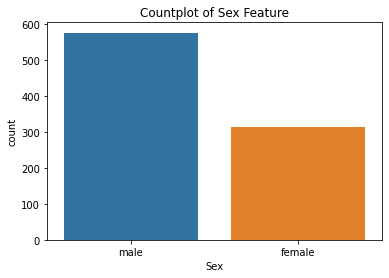

In [8]:
sns.countplot(train['Sex'])
plt.title('Countplot of Sex Feature')

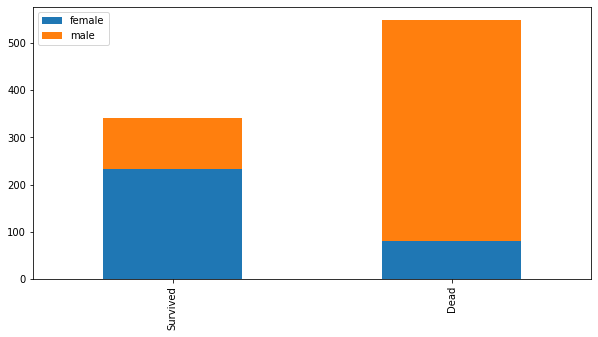

In [47]:
bar_chart('Sex')

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of Embarked Feature')

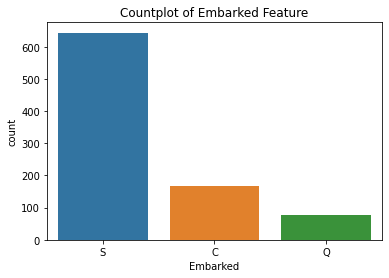

In [10]:
sns.countplot(train['Embarked'])
plt.title('Countplot of Embarked Feature')

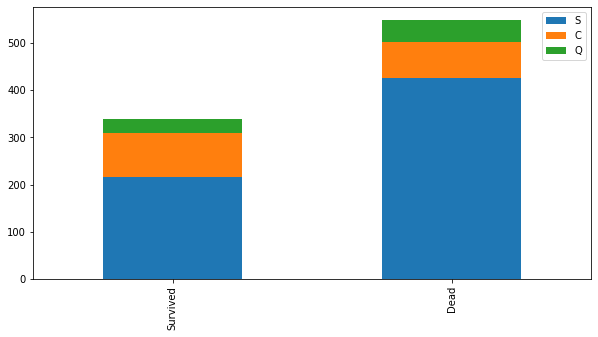

In [48]:
bar_chart('Embarked')

In [11]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of Pclass Feature')

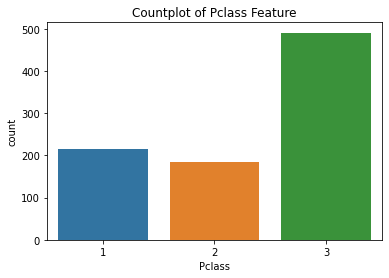

In [12]:
sns.countplot(train['Pclass'])
plt.title('Countplot of Pclass Feature')

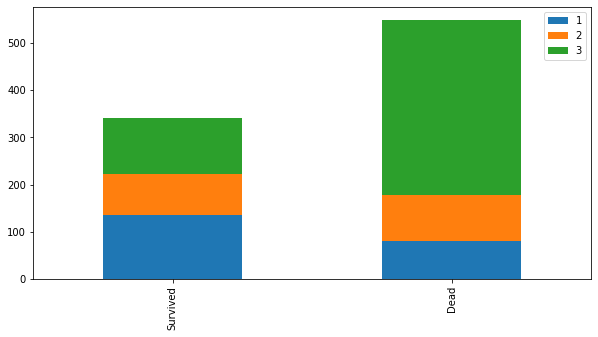

In [49]:
bar_chart('Pclass')

In [13]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of Parch Feature')

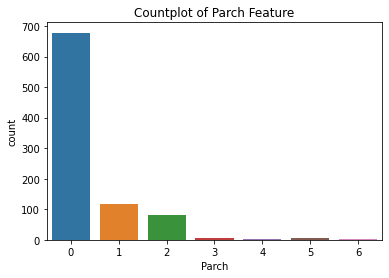

In [14]:
sns.countplot(train['Parch'])
plt.title('Countplot of Parch Feature')

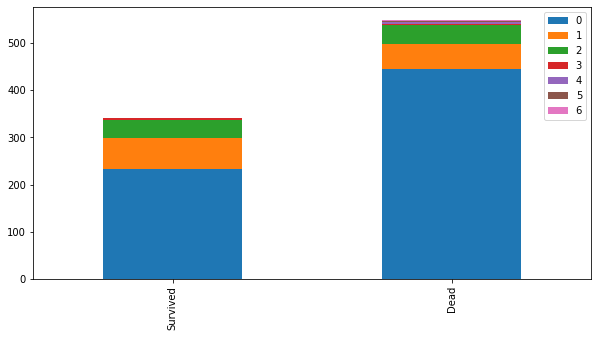

In [50]:
bar_chart('Parch')

In [52]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of SibSp Feature')

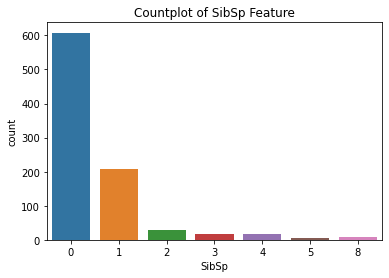

In [53]:
sns.countplot(train['SibSp'])
plt.title('Countplot of SibSp Feature')

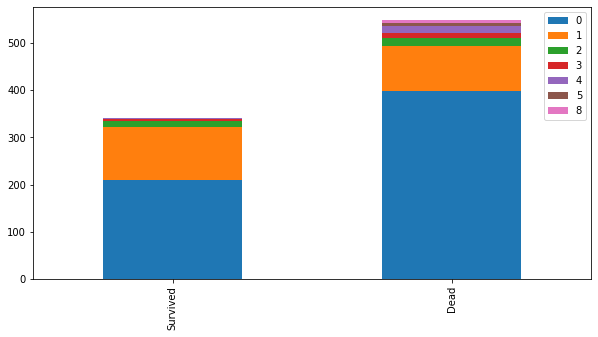

In [54]:
bar_chart('SibSp')

In [61]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of Pclass Feature')

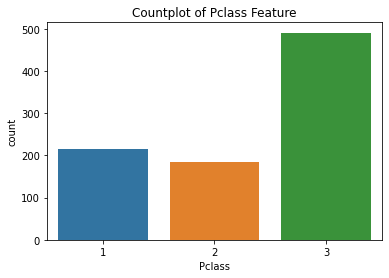

In [62]:
sns.countplot(train['Pclass'])
plt.title('Countplot of Pclass Feature')

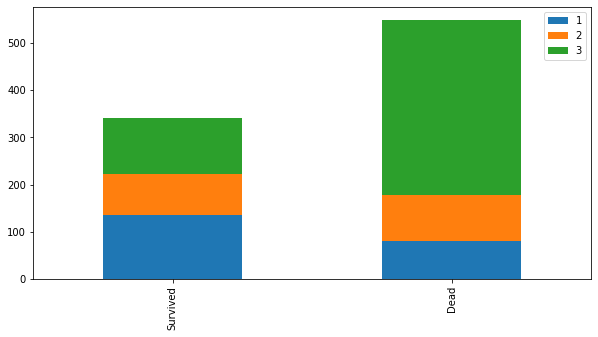

In [63]:
bar_chart('Pclass')

In [64]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of Age Feature')

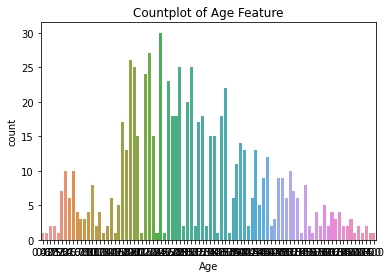

In [65]:
sns.countplot(train['Age'])
plt.title('Countplot of Age Feature')

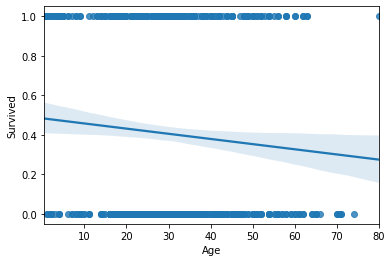

In [68]:
sns.regplot(data= train,x ='Age' , y = 'Survived')

#### 수치형 특성과 타겟 Survived간의 관계

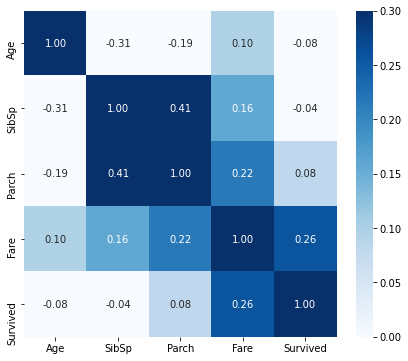

In [15]:
fig, ax = plt.subplots(figsize=(7, 6))
cmap = sns.color_palette("Blues", as_cmap=True)
train_corr = train[['Age','SibSp','Parch','Fare','Survived']]
sns.heatmap(train_corr.corr(), annot=True, fmt=".2f", ax=ax, cmap=cmap, vmin = 0, vmax = 0.3)
plt.show()

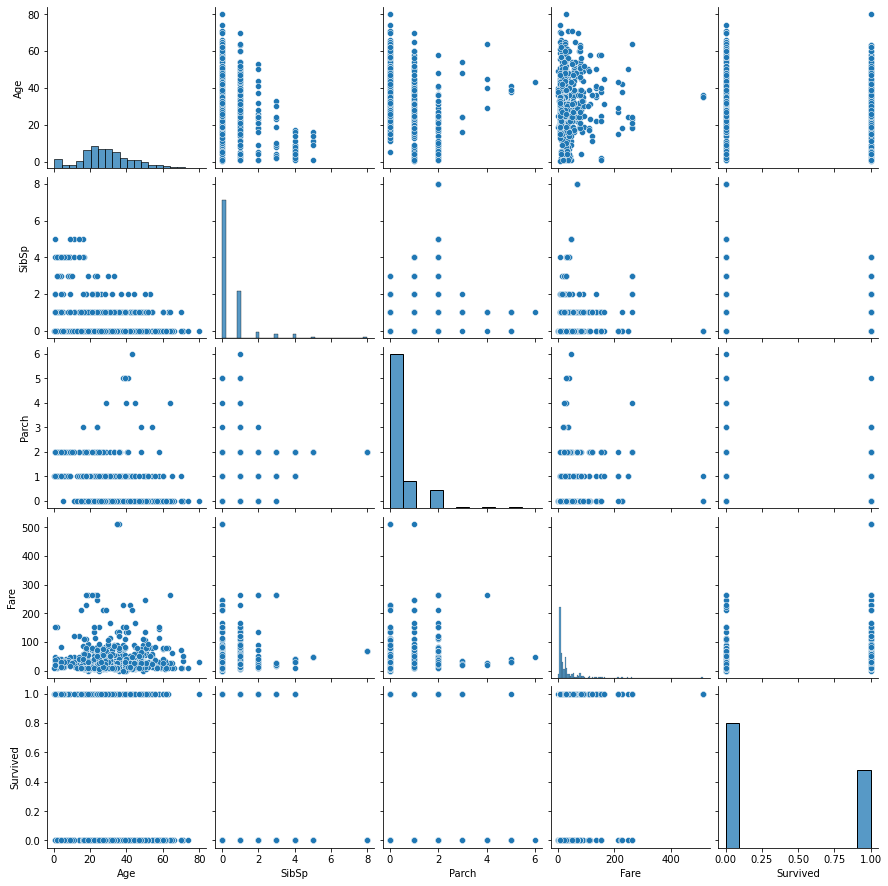

In [16]:
sns.pairplot(train_corr)
plt.show()

#### 타겟 특성 Survived의 비율 확인

In [17]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of Survived Feature')

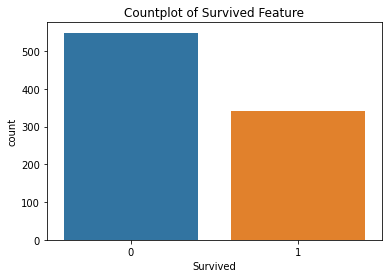

In [18]:
sns.countplot(train['Survived'])
plt.title('Countplot of Survived Feature')

> 범주형 특성 숫자로 바꾸어 나타내기 - Sex, Embarked

In [19]:
def features(df):
  # 성별 - male : 0, female : 1
  mapping = {'male':0,'female':1}
  df['Sex'] = df['Sex'].replace(mapping)

  # 탑승항구 - S : 0, C : 1, Q : 2
  mapping2 = {'S':0,'C':1,'Q':2}
  df['Embarked'] = df['Embarked'].replace(mapping2)

features(train)
features(test)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


> 훈련/검증세트 분리

In [22]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, random_state=2)
print("train shape: ", train.shape)
print("test shape: ", val.shape)

train shape:  (668, 12)
test shape:  (223, 12)


> 타겟과 예측할 특성 분리

In [23]:
target = 'Survived'
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

> 사용할 모델 import

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import sklearn.metrics as metrics

> 결측치 평균값으로 채워 줌 - simple imputer

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer() 
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

> Logistic regression

In [26]:
logistic = LogisticRegression()
logistic.fit(X_train_imputed, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print('Logistic Regression Accuracy : ', round(logistic.score(X_val_imputed, y_val),2))

Logistic Regression Accuracy :  0.78


In [28]:
#예측
X_test = test[features]
X_test_imputed = imputer.transform(X_test)
y_pred_test = logistic.predict(X_test_imputed)

In [29]:
submission = test[['PassengerId']].copy()
submission['Survived'] = y_pred_test

In [30]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
# submission.to_csv('submission_titanic.csv', index=False)

> Decision Tree

In [32]:
pipe = make_pipeline(
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=10)
)

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_val)

print('Decision Tree Accuracy : ', round(metrics.accuracy_score(y_val, y_pred),2))

Decision Tree Accuracy :  0.75


In [33]:
#예측
y_pred_test_tree = pipe.predict(X_test_imputed)

In [34]:
submission_tree = test[['PassengerId']].copy()
submission_tree['Survived'] = y_pred_test_tree

In [35]:
submission_tree

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


> Random Forest

In [36]:
pipe2 = make_pipeline(
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_val)

print('Random Forest Accuracy : ', round(metrics.accuracy_score(y_val, y_pred2),2))

Random Forest Accuracy :  0.83


In [37]:
#예측
y_pred_test_forest = pipe2.predict(X_test_imputed)

In [38]:
submission_forest = test[['PassengerId']].copy()
submission_forest['Survived'] = y_pred_test_forest

In [39]:
submission_forest

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
